In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
df.shape

(284807, 31)

In [6]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

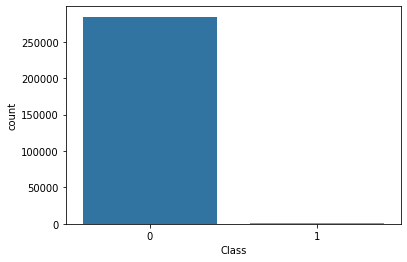

In [9]:
sns.countplot(df.Class)

In [10]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [11]:
Fraud=df[df['Class']==1]
Normal=df[df['Class']==0]


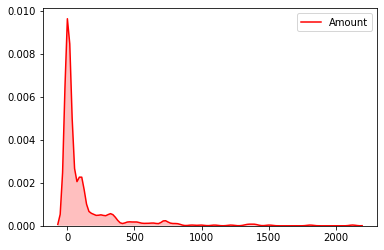

In [12]:
#Distribution of Amount of Money in Fraudulent Transaction
sns.kdeplot(Fraud['Amount'],shade=True,color='red')

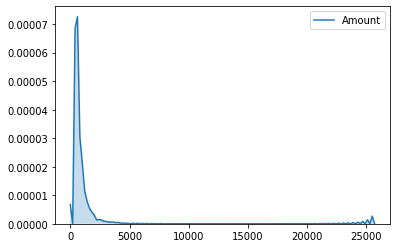

In [13]:
#Distribution of Amount of Money in Non-Fraudulent Transaction
sns.kdeplot(Normal['Amount'],shade=True)

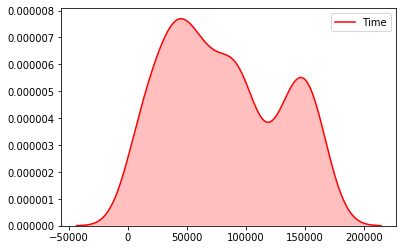

In [14]:
#Distribution of Time in Fraudulent Transaction
sns.kdeplot(Fraud['Time'],shade=True,color='red')

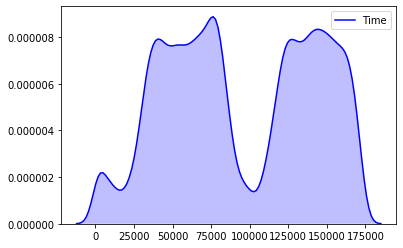

In [15]:
#Distribution of Time in Non-Fraudulent Transaction
sns.kdeplot(Normal['Time'],shade=True,color='Blue')

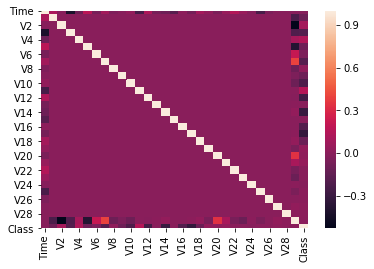

In [16]:
sns.heatmap(df.corr(),annot=False)

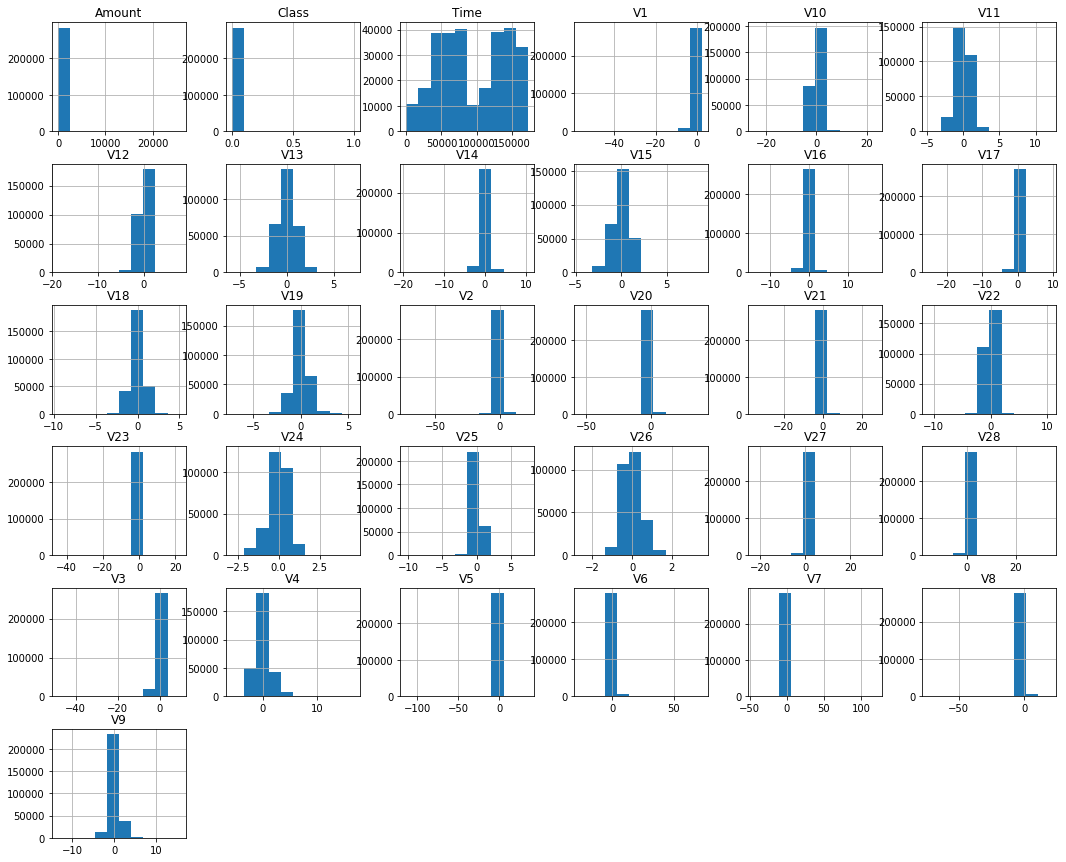

In [17]:
df.hist(figsize=(18,15))
plt.show()

In [18]:
y=df.Class
x=df.drop('Class',axis=1)

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=15)

In [20]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [21]:
model=SGDClassifier(shuffle=True)
model.fit(x_train,y_train)
prediction=model.predict(x_test)

In [22]:
print('intercept: ',model.intercept_)
print('Coefficients: ',model.coef_)

intercept:  [-213.07960229]
Coefficients:  [[  0.64555888  -1.11681701   0.62875076  -3.71080615   8.35840968
    3.28431079  -1.7552655   -0.73899675  -4.78540103  -3.53517768
   -6.23597566   4.29226742  -6.289607    -1.45249536 -13.99756111
   -0.5148994   -1.92511492  -0.02618651   1.31358221  -1.31508668
    0.38201493   2.24921799   1.28702669  -1.38100055  -1.20958515
   -0.1791754    0.53019483  -0.03841341   0.23373799   1.5416067 ]]


In [23]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56857
           1       0.80      0.49      0.60       105

    accuracy                           1.00     56962
   macro avg       0.90      0.74      0.80     56962
weighted avg       1.00      1.00      1.00     56962



In [24]:
print('Accuracy Score: ',accuracy_score(y_test,prediction))

Accuracy Score:  0.9988237772550121


In [25]:
cm=confusion_matrix(y_test,prediction)
cm

array([[56844,    13],
       [   54,    51]], dtype=int64)

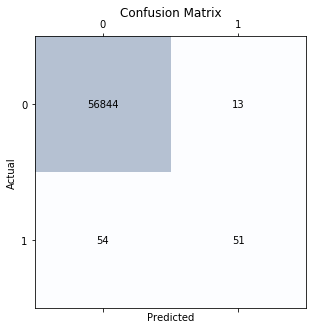

In [26]:
fig,ax=plt.subplots(figsize=(5,5))
ax.matshow(cm,cmap=plt.cm.Blues,alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j,y=i,s=cm[i,j],va='center',ha='center')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

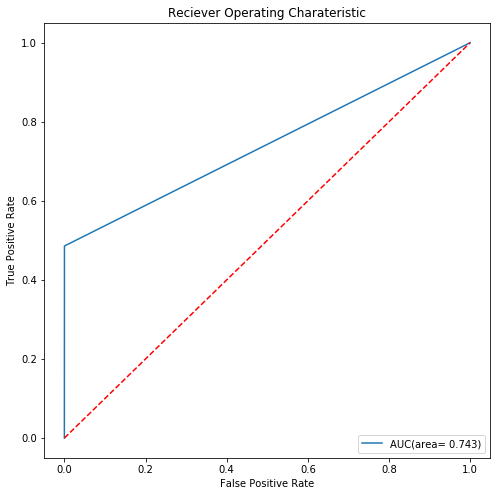

In [27]:
plt.figure(figsize=(8,8))
auc=roc_auc_score(y_test,prediction)
fpr,tpr,thr=roc_curve(y_test,model.predict(x_test))
plt.plot(fpr,tpr,label='AUC(area=% 0.3f)'% auc)
plt.plot([0,1],[0,1],'r--')
plt.title('Reciever Operating Charateristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()